In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from graphviz import Source
from IPython.display import SVG
from IPython.core.display import display, HTML

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import warnings
warnings.filterwarnings("ignore")

## Data understanding
De aangeleverde dataset wordt ingelezen.

Kolommen die ons interessant lijken worden geisoleerd in een nieuwe DataFrame.
- stm_sap_meld_ddt Tijdstip van melding
- stm_geo_mld	Geo code van melding
- stm_equipm_nr_mld	Equipment nummer
- stm_equipm_soort_mld	Equipment soort
- stm_km_van_mld	Locatie bepaling via kilometerwaarde van
- stm_km_tot_mld	Locatie bepaling via kilometerwaarde tot
- stm_prioriteit	Prioriteitsindicatie
- stm_geo_gst	Geo code van melding
- stm_oorz_code	Oorzaak code
- stm_sap_melddatum	Datum melding
- stm_sap_meldtijd	Tijdstip melding
- stm_contractgeb_mld	Contract gebied melding
- stm_techn_mld	Techniekveld melding
- stm_techn_gst	Techniekveld melding
- stm_aanngeb_dd	Datum aannemer gebeld
- stm_aanngeb_tijd	Tijdstip aannemer gebeld
- stm_aanntpl_dd	Datum aannemer ter plaatse
- stm_aanntpl_tijd	Tijdstip aannemer ter plaatse
- stm_sap_storeinddatum	Datum einde storing
- stm_sap_storeindtijd	Tijdstip einde storing
- stm_fh_tijd	Tijdstip van functieherstel
- stm_fh_duur	Duur van functiehersteltijd

## Data preparation

In [2]:
df_full = pd.read_csv("data/sap_storing_data_hu_project.csv", low_memory=False)

In [3]:
df = df_full[["stm_sap_meld_ddt",  "stm_geo_mld",  "stm_equipm_nr_mld",  "stm_equipm_soort_mld",  "stm_km_van_mld",  "stm_km_tot_mld",  "stm_prioriteit",  "stm_geo_gst",  "stm_oorz_code",  "stm_sap_melddatum",  "stm_sap_meldtijd",  "stm_contractgeb_mld",  "stm_techn_mld",  "stm_techn_gst",  "stm_aanngeb_dd",  "stm_aanngeb_tijd",  "stm_aanntpl_dd",  "stm_aanntpl_tijd", "stm_sap_storeinddatum", "stm_sap_storeindtijd", 'stm_fh_tijd', 'stm_fh_duur']]
df.head(10)

,stm_sap_meld_ddt,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst,stm_oorz_code,stm_sap_melddatum,...,stm_techn_mld,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_fh_tijd,stm_fh_duur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/2006 09:00:00,624.0,NaN,NaN,0.0,0.0,9.0,624.0,133.0,02/01/2006,...,NaN,S,02/01/2006,09:00:00,NaN,00:00:00,02/01/2006,09:00:00,09:00:00,0.0
2,02/01/2006 12:35:00,201.0,NaN,NaN,0.0,0.0,9.0,201.0,143.0,02/01/2006,...,NaN,B,02/01/2006,12:35:00,NaN,00:00:00,02/01/2006,13:26:00,13:26:00,51.0
3,02/01/2006 16:40:00,25.0,NaN,NaN,0.0,0.0,9.0,25.0,142.0,02/01/2006,...,NaN,B,02/01/2006,16:40:00,NaN,00:00:00,02/01/2006,17:20:00,17:20:00,40.0
4,02/01/2006 22:30:00,12.0,NaN,NaN,0.0,0.0,9.0,12.0,142.0,02/01/2006,...,NaN,B,02/01/2006,22:30:00,NaN,00:00:00,02/01/2006,22:36:00,22:36:00,6.0
5,02/01/2006 11:23:00,614.0,10621391.0,DETECTREIN,0.0,0.0,9.0,614.0,218.0,02/01/2006,...,S,S,02/01/2006,11:23:00,NaN,00:00:00,NaN,00:00:00,11:30:00,7.0
6,02/01/2006 23:25:00,551.0,NaN,NaN,0.0,0.0,9.0,551.0,142.0,02/01/2006,...,NaN,B,02/01/2006,23:25:00,NaN,00:00:00,03/01/2006,09:44:00,23:38:00,13.0
7,02/01/2006 16:45:00,17.0,NaN,NaN,0.0,0.0,9.0,17.0,143.0,02/01/2006,...,NaN,B,02/01/2006,16:45:00,NaN,00:00:00,02/01/2006,17:00:00,17:00:00,15.0
8,02/01/2006 14:18:00,506.0,10680137.0,OVERWEG,0.0,0.0,9.0,506.0,141.0,02/01/2006,...,B,B,02/01/2006,14:18:00,NaN,00:00:00,02/01/2006,14:48:00,14:48:00,30.0
9,02/01/2006 12:00:00,73.0,NaN,NaN,0.0,0.0,9.0,73.0,135.0,02/01/2006,...,NaN,B,02/01/2006,12:00:00,NaN,00:00:00,02/01/2006,12:00:00,12:00:00,0.0


In [4]:
df = df.drop_duplicates(keep='last')
df.count()

stm_sap_meld_ddt         657807
stm_geo_mld              649496
stm_equipm_nr_mld        484438
stm_equipm_soort_mld     484435
stm_km_van_mld           657804
stm_km_tot_mld           657804
stm_prioriteit           657688
stm_geo_gst              538901
stm_oorz_code            614029
stm_sap_melddatum        657777
stm_sap_meldtijd         657777
stm_contractgeb_mld      484354
stm_techn_mld            486954
stm_techn_gst            657592
stm_aanngeb_dd           636126
stm_aanngeb_tijd         657777
stm_aanntpl_dd           511219
stm_aanntpl_tijd         657777
stm_sap_storeinddatum    490920
stm_sap_storeindtijd     657777
stm_fh_tijd              657777
stm_fh_duur              657777
dtype: int64

In [5]:
df.dtypes

stm_sap_meld_ddt          object
stm_geo_mld               object
stm_equipm_nr_mld        float64
stm_equipm_soort_mld      object
stm_km_van_mld           float64
stm_km_tot_mld           float64
stm_prioriteit           float64
stm_geo_gst               object
stm_oorz_code            float64
stm_sap_melddatum         object
stm_sap_meldtijd          object
stm_contractgeb_mld      float64
stm_techn_mld             object
stm_techn_gst             object
stm_aanngeb_dd            object
stm_aanngeb_tijd          object
stm_aanntpl_dd            object
stm_aanntpl_tijd          object
stm_sap_storeinddatum     object
stm_sap_storeindtijd      object
stm_fh_tijd               object
stm_fh_duur              float64
dtype: object

### Niet alle columns zijn het correcte datatype
Hieronder worden de volgende tijden en data gecombineerd in datatimes:
- stm_sap_storeind -> datetime van stm_sap_storeindtijd + stm_sap_storeinddatum
- stm_sap_meld -> datetime van stm_sap_meldtijd + stm_sap_melddatum
- stm_aanngeb -> datetime van stm_aanngeb_tijd + stm_aanngeb_dd
- stm_aanntpl -> datetime van stm_aanntpl_tijd + stm_aanntpl_dd

In [6]:
df = df[df['stm_sap_storeindtijd']!="::"]
df = df[df['stm_sap_storeindtijd']!=":"]
df['stm_sap_storeind'] = pd.to_datetime(df['stm_sap_storeindtijd'] + ' ' + df['stm_sap_storeinddatum'],errors='coerce')
df['stm_sap_meld'] = pd.to_datetime(df['stm_sap_meldtijd'] + ' ' + df['stm_sap_melddatum'],errors='coerce')
df['stm_aanngeb'] = pd.to_datetime(df['stm_aanngeb_tijd'] + ' ' + df['stm_aanngeb_dd'],errors='coerce')
df['stm_aanntpl'] = pd.to_datetime(df['stm_aanntpl_tijd'] + ' ' + df['stm_aanntpl_dd'],errors='coerce')
df['stm_sap_storeind'].count()

490919

Enkel de waardes tussen 5 en 360 minuten (6 uur) worden gepakt. Dit is om uitschieters en storingen die bijna gelijk opgelost zijn niet mee te nemen. Deze zijn niet relevant voor de reizigers.

In [7]:
df = df[df['stm_fh_duur'].between(5, 360)]

In [8]:
# # Verkeerde/lege data droppen
df = df.dropna(subset=['stm_sap_storeind'])
df = df.dropna(subset=['stm_sap_meld'])
df['stm_sap_storeind'].count()

350036

In [9]:
df.dtypes

stm_sap_meld_ddt                 object
stm_geo_mld                      object
stm_equipm_nr_mld               float64
stm_equipm_soort_mld             object
stm_km_van_mld                  float64
stm_km_tot_mld                  float64
stm_prioriteit                  float64
stm_geo_gst                      object
stm_oorz_code                   float64
stm_sap_melddatum                object
stm_sap_meldtijd                 object
stm_contractgeb_mld             float64
stm_techn_mld                    object
stm_techn_gst                    object
stm_aanngeb_dd                   object
stm_aanngeb_tijd                 object
stm_aanntpl_dd                   object
stm_aanntpl_tijd                 object
stm_sap_storeinddatum            object
stm_sap_storeindtijd             object
stm_fh_tijd                      object
stm_fh_duur                     float64
stm_sap_storeind         datetime64[ns]
stm_sap_meld             datetime64[ns]
stm_aanngeb              datetime64[ns]


## Data exploration
Hieronder ga ik onderzoeken of de kolom 'stm_equipm_soort_mld' een interessante waarde is.
Eerst ga ik tellen hoeveel van elke soort er voorkomen. Daarna pak ik alle categorieën die minimaal 1000 storingen hebben, omdat een groot deel van storingen zo weinig voorkomt dat een goede voorspelling daarvoor erg moeilijk zal zijn. En omdat ik niet teveel kolommen wil voor de performance.

De meest voorkomende waardes zijn als volgt:

In [10]:
df['stm_equipm_soort_mld'].value_counts(dropna=False)[:30]

NaN           62431
WISSEL        41833
OVERWEG       36107
SEIN          26119
TBHHARDW      20380
DETGRSSSL     14053
VISUELERIS    13351
ICTINFRA      12804
DETECTREIN    10153
HEKWERK        4468
SPOORBRUG      4209
PLAATSBEP      4183
TREINBEINV     3998
BAANLICHAA     3969
RISANALOOG     3835
SPOORTAK       3738
OMROEPOP       3642
TIJDKLOK       3627
TUNCONSTR      3076
TANKINST       2935
SPOORSPS       2065
GEBOUW         2052
OMROEPHP       1984
SNSCHAKAUT     1941
LVNOODSTGR     1844
SPOORTUN       1633
LOC_VOED       1568
TTI            1495
SEIN_BORD      1478
WISVERWINS     1459
Name: stm_equipm_soort_mld, dtype: int64

Dan ga ik kijken wat de gemiddelde reparatietijd is voor elke soort.

Text(0.5, 0, 'Reparatieduur (min)')

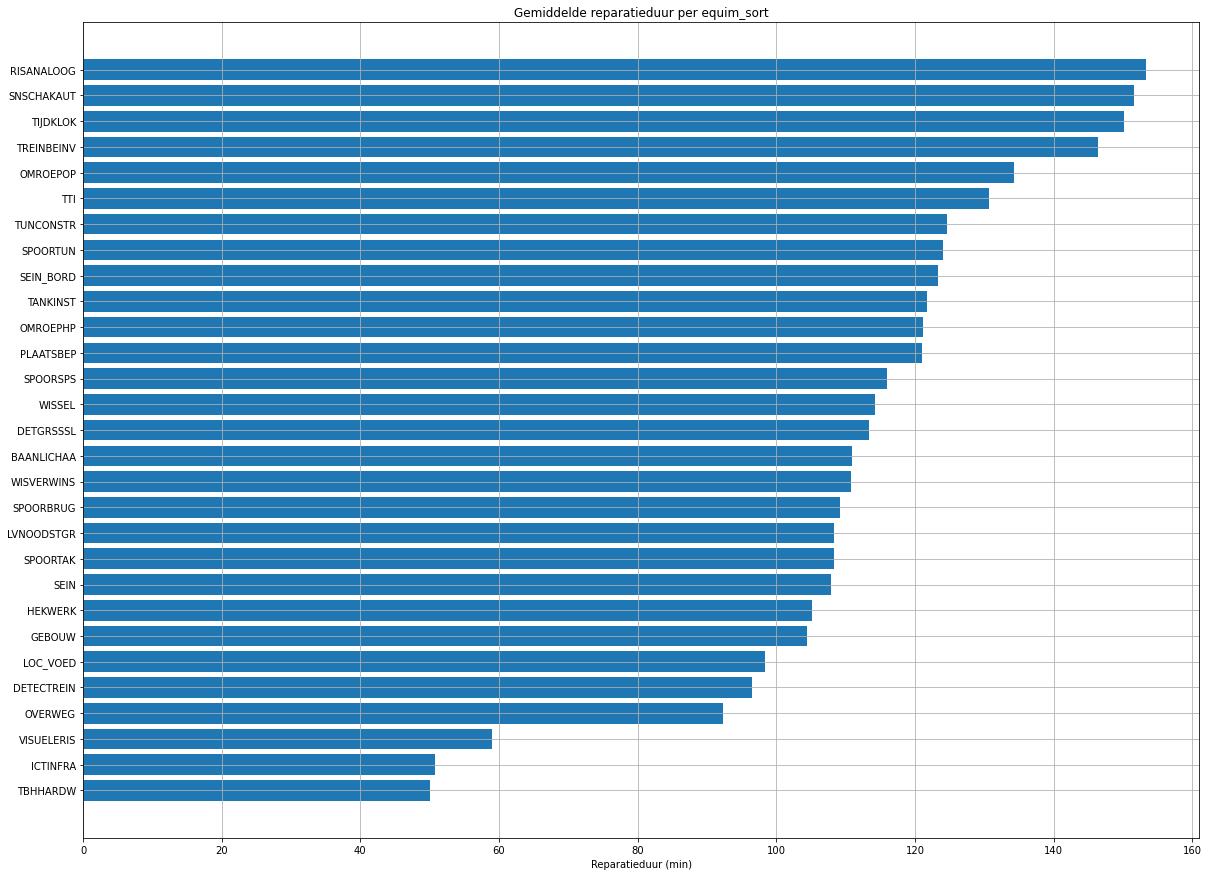

In [11]:
common_equipm_sort = df['stm_equipm_soort_mld'].value_counts(dropna=False)[:30].index
average_time_per_equipm_sort = df[df['stm_equipm_soort_mld'].isin(common_equipm_sort)].groupby('stm_equipm_soort_mld')['stm_fh_duur'].mean().sort_values()

plt.figure(figsize=[20,15])
plt.barh(average_time_per_equipm_sort.index, average_time_per_equipm_sort.values)
plt.grid()
plt.title("Gemiddelde reparatieduur per equim_sort")
plt.xlabel("Reparatieduur (min)")

Ik haal alle storingen die niet in de top 30 zitten uit de dataframe.

In [12]:
df = df[df['stm_equipm_soort_mld'].isin(common_equipm_sort)]
df.shape

(296430, 26)

In [13]:
def GetAverageRepairTime(column):
    ret = df[['stm_fh_duur', column]]
    
    ret.dropna(inplace=True)
    ret.reset_index(inplace=True)
    del ret['index']

    ret = ret.groupby(column, as_index=False)['stm_fh_duur'].mean()
    ret.rename(columns={'stm_fh_duur': 'stm_fh_duur_avg'}, inplace=True)

    ret.set_index(column, inplace=True)

    return ret

## Data construction
De tijd kolommen worden verdeeld in stukken van een half uur zodat we tijd als categorische data kunnen gebruiken omdat deze als kwantitatieve data niet goed bruikbaar is.

In [14]:
df['stm_sap_meldtijd'] = pd.to_datetime(df['stm_sap_meldtijd'], errors='coerce')
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dt.floor('60T').dt.time
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dropna()

In [15]:
df['stm_sap_meldtijd']

2         12:00:00
3         16:00:00
4         22:00:00
6         23:00:00
7         16:00:00
            ...   
898507    02:00:00
898521    08:00:00
898523    09:00:00
898524    14:00:00
898525    14:00:00
Name: stm_sap_meldtijd, Length: 296430, dtype: object

## Clusteren op techniekveld
Hieronder zien we dat er een aantal techniekvelden zijn die opvallen.
De storingen met als veld "H" duren aanzienlijk langer, terwijl de "P" storing juist weer aanzienlijk korter duren.

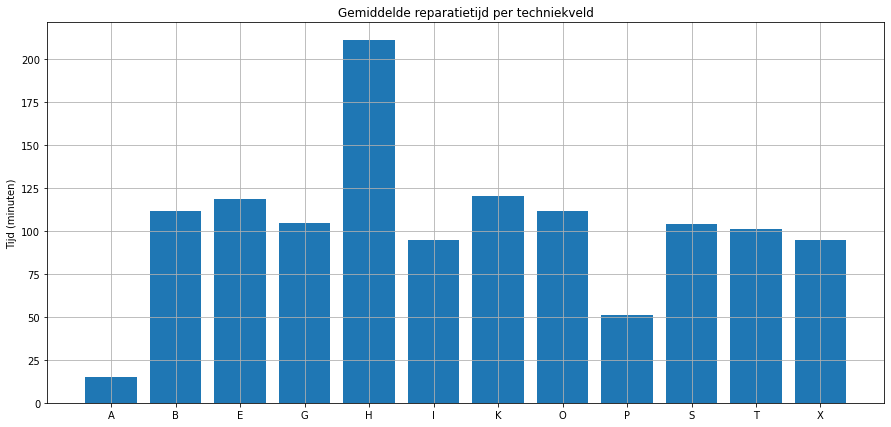

In [16]:
average_times_per_techfield = GetAverageRepairTime('stm_techn_mld')
plt.figure(figsize=[15,7])
plt.bar(average_times_per_techfield.index, average_times_per_techfield.stm_fh_duur_avg)
plt.title("Gemiddelde reparatietijd per techniekveld")
plt.ylabel("Tijd (minuten)")
plt.grid()

## Baseline
We gaan de baseline opstellen door het gemiddelde per techniekveld te gebruiken.

In [17]:
df_bl = df[['stm_fh_duur', 'stm_techn_mld']]

df_bl = pd.merge(   df_bl, 
                    GetAverageRepairTime('stm_techn_mld'), 
                    left_on='stm_techn_mld', right_on='stm_techn_mld')

print("Baseline MAE  :",mean_absolute_error(df_bl['stm_fh_duur_avg'], df_bl['stm_fh_duur']))
print("Baseline RMSE :",np.sqrt(mean_squared_error(df_bl['stm_fh_duur_avg'], df_bl['stm_fh_duur'])))

Baseline MAE  : 60.067137450100425
Baseline RMSE : 77.62925012154145


### Dummies encoden
Alle techniekvelden, prioriteiten en meldtijden afgerond op 30 minuten worden in dummies geplitst. In de tabel hieronder zie je hoe alle categorische data in aparte kolommen is gezet.

In [18]:
df_reg = df[['stm_techn_mld', 'stm_prioriteit', 'stm_sap_meldtijd', 'stm_equipm_soort_mld' ,'stm_fh_duur']]

dummies1 = pd.get_dummies(df_reg['stm_techn_mld']).astype('category')
dummies2 = pd.get_dummies(df_reg['stm_sap_meldtijd']).astype('category')
dummies3 = pd.get_dummies(df_reg['stm_prioriteit']).astype('category')
dummies4 = pd.get_dummies(df_reg['stm_equipm_soort_mld']).astype('category')
df_reg = df_reg.join(dummies1).drop(columns=['stm_techn_mld'])
df_reg = df_reg.join(dummies2).drop(columns=['stm_sap_meldtijd'])
df_reg = df_reg.join(dummies3).drop(columns=['stm_prioriteit'])
df_reg = df_reg.join(dummies4).drop(columns=['stm_equipm_soort_mld'])

X = df_reg.drop(columns=['stm_fh_duur'])
y = df_reg['stm_fh_duur']

print(X.dtypes)
X

A             category
B             category
E             category
G             category
H             category
                ...   
TTI           category
TUNCONSTR     category
VISUELERIS    category
WISSEL        category
WISVERWINS    category
Length: 71, dtype: object


,A,B,E,G,H,I,K,O,P,S,...,SPOORTUN,TANKINST,TBHHARDW,TIJDKLOK,TREINBEINV,TTI,TUNCONSTR,VISUELERIS,WISSEL,WISVERWINS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898523,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
898524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## DecisionTreeRegressor
Ik gebruik hier een decision tree regressor.
Deze scoort marginaal beter met een verbetering van 79 RMSE naar 74 RMSE. Om een juiste balans te vinden tussen accuratie en transparantie, zijn een aantal verschillende hoeveelheden maximale leaf nodes getest. Het is de bedoeling dat de decision tree er overzichtelijk en niet te complex uit ziet, terwijl deze tegelijkertijd wel een nuttig eindresultaat moet geven.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
last_rmse = None

for n in [10,12,14,16,18,20,22,24,26,28,30,40,50,60,70,80,90,100]:
    reg = DecisionTreeRegressor(criterion='mse', random_state=870, min_impurity_decrease=1, max_leaf_nodes=n)

    reg_columns = X_train.columns
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    if last_rmse == None:
        last_rmse = rmse
        diff = 0
    else:
        diff = abs(rmse - last_rmse)
        last_rmse = rmse
    print("{} nodes: MAE={:.2f}, RMSE={:.2f}, diff={:.2f}".format(n,mean_absolute_error(y_pred, y_test),np.sqrt(mean_squared_error(y_pred, y_test)), diff))

n = 22
reg = DecisionTreeRegressor(criterion='mse', random_state=870, min_impurity_decrease=1, max_leaf_nodes=n)
reg_columns = X_train.columns
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

10 nodes: MAE=57.53, RMSE=75.12, diff=0.00
12 nodes: MAE=57.31, RMSE=74.90, diff=0.21
14 nodes: MAE=57.13, RMSE=74.74, diff=0.17
16 nodes: MAE=57.00, RMSE=74.63, diff=0.11
18 nodes: MAE=56.92, RMSE=74.54, diff=0.09
20 nodes: MAE=56.83, RMSE=74.44, diff=0.10
22 nodes: MAE=56.72, RMSE=74.35, diff=0.09
24 nodes: MAE=56.61, RMSE=74.29, diff=0.06
26 nodes: MAE=56.53, RMSE=74.22, diff=0.07
28 nodes: MAE=56.48, RMSE=74.16, diff=0.06
30 nodes: MAE=56.47, RMSE=74.15, diff=0.01
40 nodes: MAE=56.35, RMSE=74.03, diff=0.12
50 nodes: MAE=56.24, RMSE=73.94, diff=0.09
60 nodes: MAE=56.14, RMSE=73.85, diff=0.09
70 nodes: MAE=56.07, RMSE=73.75, diff=0.10
80 nodes: MAE=56.04, RMSE=73.72, diff=0.02
90 nodes: MAE=56.04, RMSE=73.72, diff=0.00
100 nodes: MAE=56.04, RMSE=73.72, diff=0.00


Wat we zien is dat er tot 22 nodes en redelijke verbetering van score zich voordoet  (+~0.09RMSE). Hierom heb ik gekozen voor een tree met 22 nodes.

Colors represent category presence in percentages: 
Black: <1%
Red: >1%
Orange: >3%
Yellow: >5%
Green: >10%
Blue: >25%


Text(0.5, 0, 'Afwijking (minuten)')

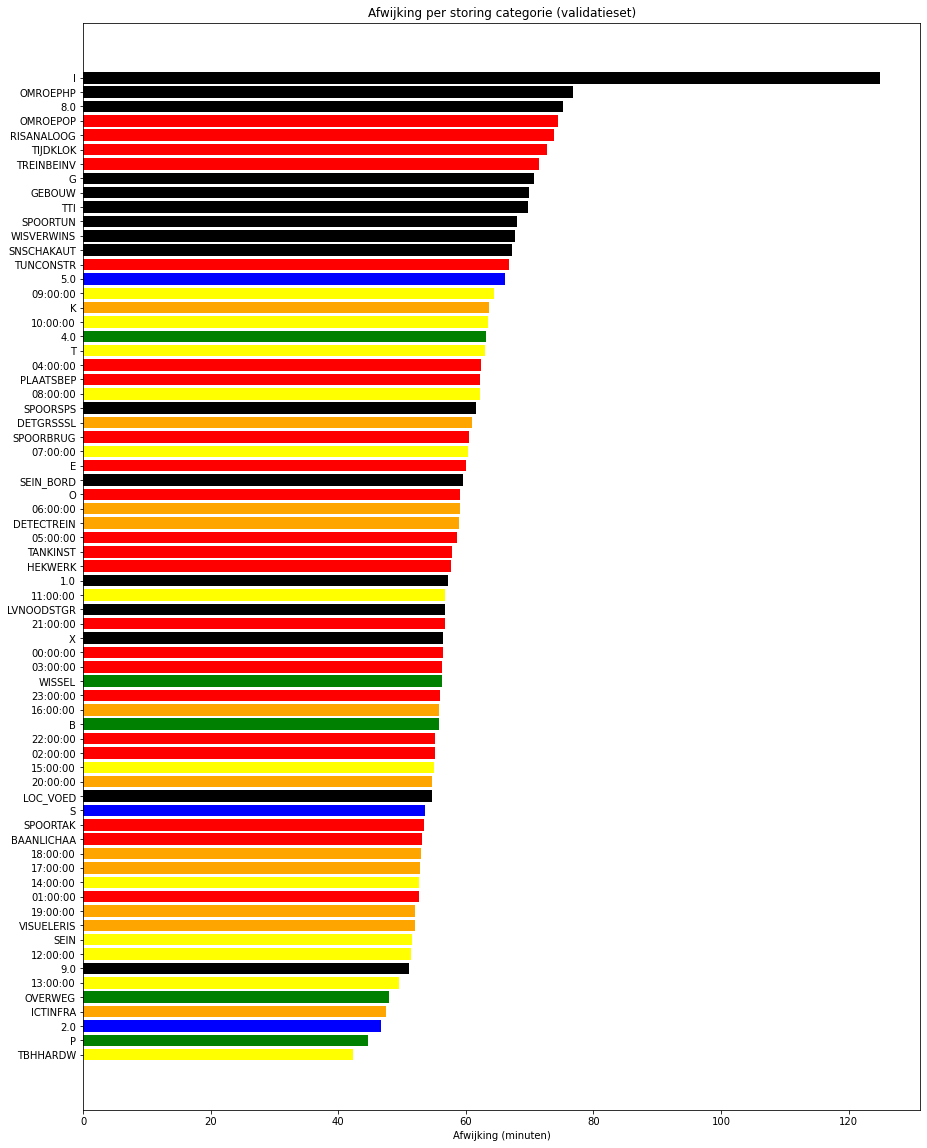

In [20]:
X = X_test.copy()
y = y_test.copy()

for col in reg_columns:
    if col not in X.columns:
        X[col] = 0
for col in X.columns:
    if col not in reg_columns:
        X = X.drop(columns=[col])

X['prediction'] = y_pred
X['diff'] = abs(y_pred - y)
X

total = X.shape[0]

diffs = []
for col in X:
    mean = X[X[col]==1]['diff'].mean()
    count = X[X[col]==1]['diff'].count() / total * 100
    diffs.append((col, mean, count))
  
diffs = pd.DataFrame(diffs, columns=['category','diff', 'count'])
diffs['category'] = diffs['category'].astype('str')
diffs = diffs.dropna()
diffs = diffs.sort_values(['diff'])

diffs['color'] = 'black'
diffs['count']= diffs['count'].astype('int')
diffs['color'][diffs['count'] >= 1] = 'red'
diffs['color'][diffs['count'] >= 3] = 'orange'
diffs['color'][diffs['count'] >= 5] = 'yellow'
diffs['color'][diffs['count'] >= 10] = 'green'
diffs['color'][diffs['count'] >= 25] = 'blue'

print("Colors represent category presence in percentages: ")
print("Black: <1%")
print("Red: >1%")
print("Orange: >3%")
print("Yellow: >5%")
print("Green: >10%")
print("Blue: >25%")

plt.figure(figsize=[15,20])
plt.barh(diffs['category'], diffs['diff'], color=diffs['color'])
plt.title("Afwijking per storing categorie (validatieset)")
plt.xlabel("Afwijking (minuten)")

Wat je hierboven ziet is de gemiddelde afwijking van de voorspelling met de echte waarde per categorie. De kleur van de balk geeft aan hoe groot deel die categorie is van de hele data. Bijvoorbeeld prioriteit 5.0 is in meer dan 25% van de gevallen toegewezen. Wel is er zelfs bij de beste categorie (ik tel I niet mee) nog een ruime 40+ minuten afwijking. Dit geeft mij de indruk dat dit niet erg nuttig zal zijn voor ProRail. Hieronder zie je de decision tree zelf. Het ziet er heel groot en complex uit, maar dit komt omdat er een aantal categoriën in aparte kolommen zijn gezet als binaire waarde. EDIT: 

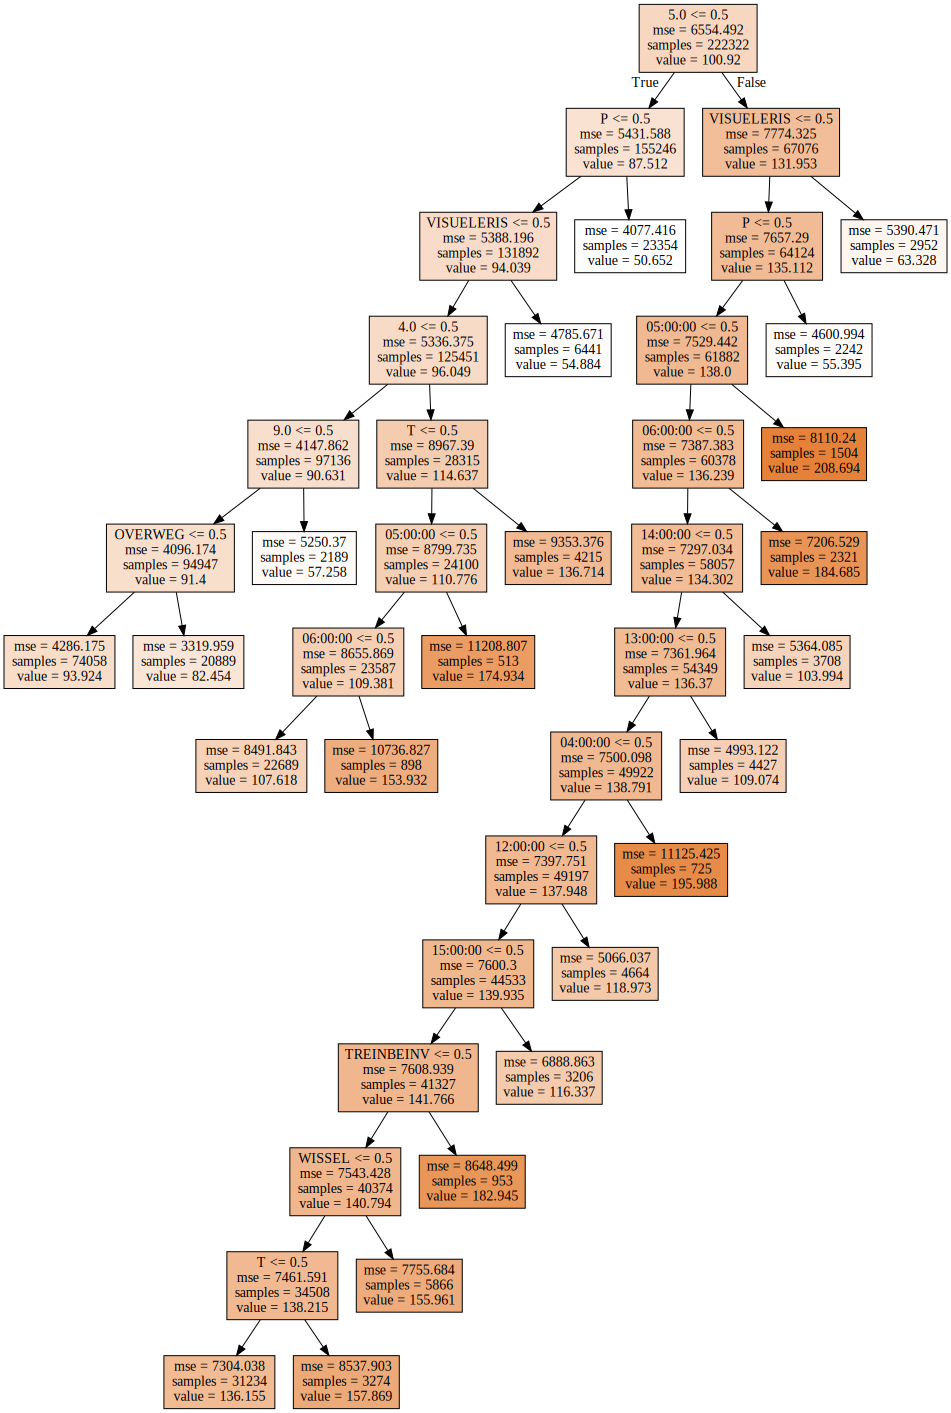

In [21]:
graph = Source( tree.export_graphviz(reg, out_file=None, feature_names=reg_columns,filled=True))
SVG(graph.pipe(format='svg'))

# Validatie
Voor de validatie voeren we dezelfde code als hierboven uit (het is dubbele code maar zo is het makkelijker omdat het boven per stuk staat uitgelegd)

In [22]:
def GetPredictions(reg, df, reg_columns):
    df['stm_sap_meldtijd'] = pd.to_datetime(df['stm_sap_meldtijd'], errors='coerce')
    df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dt.floor('60T').dt.time
    df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dropna()
    
    df_reg = df[['stm_techn_mld', 'stm_prioriteit', 'stm_sap_meldtijd', 'stm_equipm_soort_mld' ,'stm_fh_duur']]

    dummies1 = pd.get_dummies(df_reg['stm_techn_mld']).astype('category')
    dummies2 = pd.get_dummies(df_reg['stm_sap_meldtijd']).astype('category')
    dummies3 = pd.get_dummies(df_reg['stm_prioriteit']).astype('category')
    dummies4 = pd.get_dummies(df_reg['stm_equipm_soort_mld']).astype('category')
    df_reg = df_reg.join(dummies1).drop(columns=['stm_techn_mld'])
    df_reg = df_reg.join(dummies2).drop(columns=['stm_sap_meldtijd'])
    df_reg = df_reg.join(dummies3).drop(columns=['stm_prioriteit'])
    df_reg = df_reg.join(dummies4).drop(columns=['stm_equipm_soort_mld'])

    X = df_reg.drop(columns=['stm_fh_duur'])
    y = df_reg['stm_fh_duur']
    
    for col in reg_columns:
        if col not in X.columns:
            X[col] = 0
            
    for col in X.columns:
        if col not in reg_columns:
            X = X.drop(columns=[col])
    
    return reg.predict(X), X, y

In [23]:
df_validatie = pd.read_csv("data/Validatieset Excel - met targetvariabelen V2.csv", delimiter=';')
predictions, X, y = GetPredictions(reg, df_validatie, reg_columns)
predictions

array([ 93.92361392,  93.92361392,  57.2576519 ,  93.92361392,
        93.92361392,  93.92361392,  57.2576519 ,  93.92361392,
       107.61770021,  93.92361392,  93.92361392,  93.92361392,
        93.92361392,  93.92361392,  93.92361392,  93.92361392,
       136.15524749, 136.15524749,  93.92361392,  93.92361392,
       107.61770021,  93.92361392, 136.15524749,  93.92361392,
        93.92361392, 136.15524749,  93.92361392,  93.92361392,
       195.98758621,  93.92361392,  93.92361392, 153.93207127,
        93.92361392,  93.92361392,  93.92361392, 136.15524749,
        93.92361392,  93.92361392, 109.07409081,  93.92361392,
        93.92361392, 107.61770021,  93.92361392, 107.61770021,
        93.92361392,  93.92361392,  93.92361392,  93.92361392,
        93.92361392,  93.92361392,  93.92361392,  93.92361392,
        93.92361392,  93.92361392, 107.61770021,  93.92361392,
       174.9337232 ,  57.2576519 , 208.69414894, 107.61770021,
       107.61770021,  93.92361392,  93.92361392,  93.92

In [24]:
MAE = mean_absolute_error(df_validatie['stm_fh_duur'],predictions)
RMSE = np.sqrt(mean_squared_error(df_validatie['stm_fh_duur'],predictions))

print("Validatie resultaten:")
print("MEA :",MAE)
print("RMSE:",RMSE)

Validatie resultaten:
MEA : 73.06188642007437
RMSE: 98.82171385161837


Hier voeg ik een prediction en diff column toe om te kijken of er bepaalde soort storingen niet goed worden voorspeld.

In [25]:
X['prediction'] = predictions
X['true_value'] = y
X['diff'] = abs(predictions - y)
X

,B,E,G,K,O,P,S,T,00:00:00,02:00:00,...,RISANALOOG,SEIN_BORD,SNSCHAKAUT,TBHHARDW,TTI,TUNCONSTR,WISVERWINS,prediction,true_value,diff
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,93.923614,45.0,48.923614
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,93.923614,94.0,0.076386
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,57.257652,87.0,29.742348
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,93.923614,298.0,204.076386
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,93.923614,55.0,38.923614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,174.933723,4.0,170.933723
85,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,93.923614,61.0,32.923614
86,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,93.923614,61.0,32.923614
87,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,136.155247,156.0,19.844753


Colors represent category presence in percentages: 
Black: <1%
Red: >1%
Orange: >3%
Yellow: >5%
Green: >10%
Blue: >25%


Text(0.5, 0, 'Afwijking (minuten)')

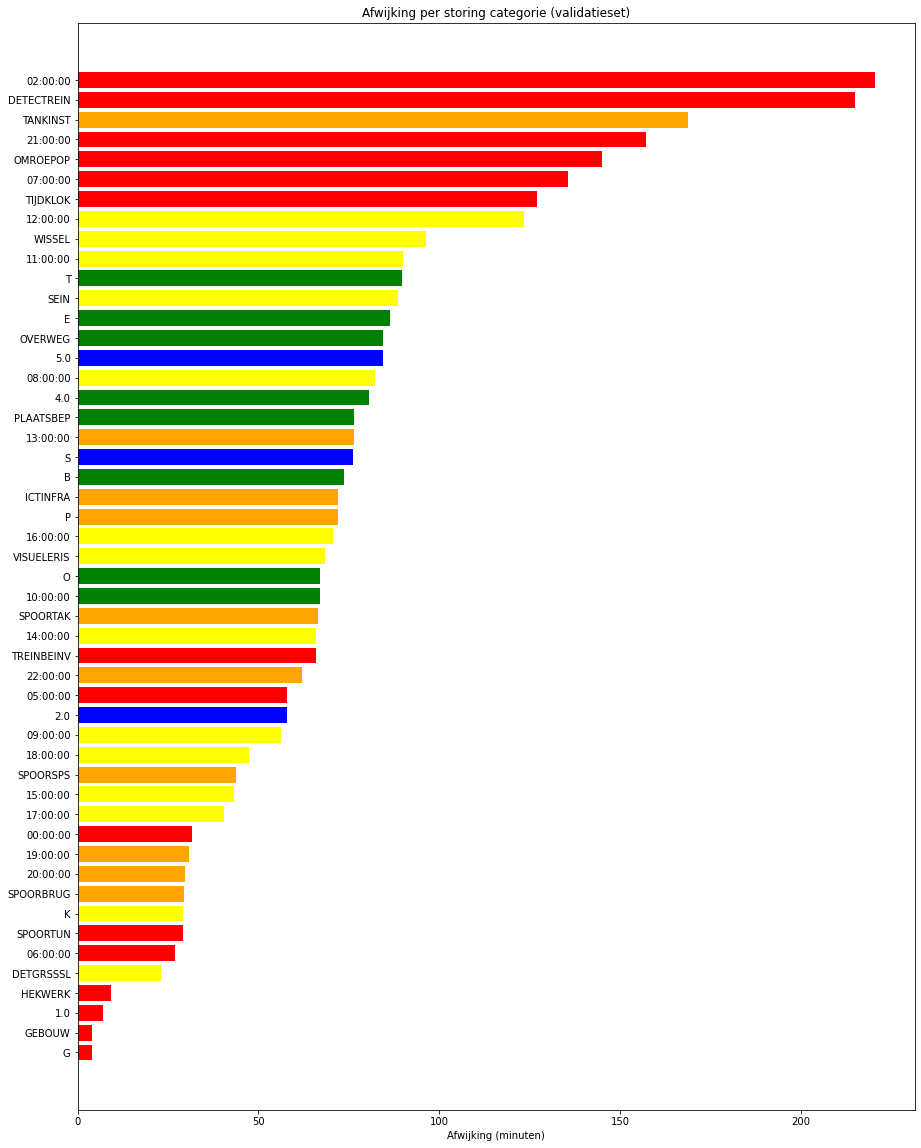

In [26]:
diffs = []
total = X.shape[0]
for col in X:
    mean = X[X[col]==1]['diff'].mean()
    count = X[X[col]==1]['diff'].count() / total * 100
    diffs.append((col, mean, count))
  
diffs = pd.DataFrame(diffs, columns=['category','diff', 'count'])
diffs['category'] = diffs['category'].astype('str')
diffs = diffs.dropna()
diffs = diffs.sort_values(['diff'])

diffs['color'] = 'black'
diffs['count']= diffs['count'].astype('int')
diffs['color'][diffs['count'] >= 1] = 'red'
diffs['color'][diffs['count'] >= 3] = 'orange'
diffs['color'][diffs['count'] >= 5] = 'yellow'
diffs['color'][diffs['count'] >= 10] = 'green'
diffs['color'][diffs['count'] >= 25] = 'blue'

print("Colors represent category presence in percentages: ")
print("Black: <1%")
print("Red: >1%")
print("Orange: >3%")
print("Yellow: >5%")
print("Green: >10%")
print("Blue: >25%")

plt.figure(figsize=[15,20])
plt.barh(diffs['category'], diffs['diff'], color=diffs['color'])
plt.title("Afwijking per storing categorie (validatieset)")
plt.xlabel("Afwijking (minuten)")

Wederom zien we hier een gemiddelde afwijking van zeker 30 minuten voor de betere categoriën. Dus hieruit weer de conclusie dat dit niet erg nuttig zal zijn voor ProRail omdat het niet accuraat genoeg is.

# Relevante Visualisatie (Evaluatie)
Hieronder alle normaalverdelingen per categorieën

In [27]:
import scipy.stats as stats
import math

In [28]:
def plot_norm(data, categories):
    sns.set_style('darkgrid')
    plt.figure(figsize=[12,8])
    for cat in categories:
        try:
            X = data.copy()
            X = X[X[cat]==1]

            mu = X['diff'].mean()
            variance = X['diff'].var()
            sigma = math.sqrt(variance)
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            plt.plot(x, stats.norm.pdf(x, mu, sigma), label=str(cat))
        except:
            continue
    plt.legend()
    plt.title('Normaalverdeling afwijking per categorie')
    plt.xlabel('Afwijking (min)')
    plt.ylabel('%')
    plt.xlim([0,180])
    plt.plot()

Normaalverdelingen prioriteiten

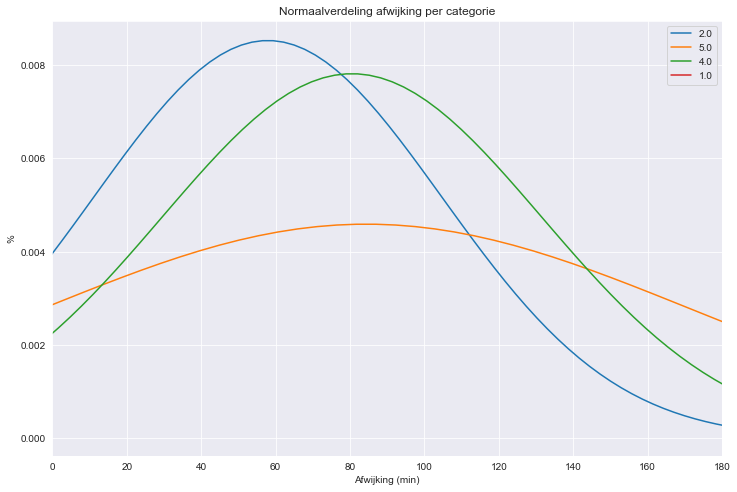

In [29]:
plot_norm(X,df_validatie['stm_prioriteit'].unique())

Normaalverdelingen techniekvelden

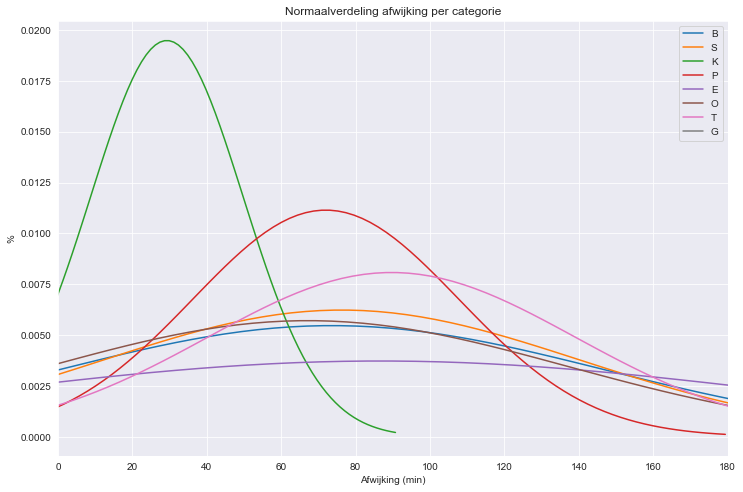

In [30]:
plot_norm(X,df_validatie['stm_techn_mld'].unique())

Normaalverdelingen stm_equipm_soort_mld

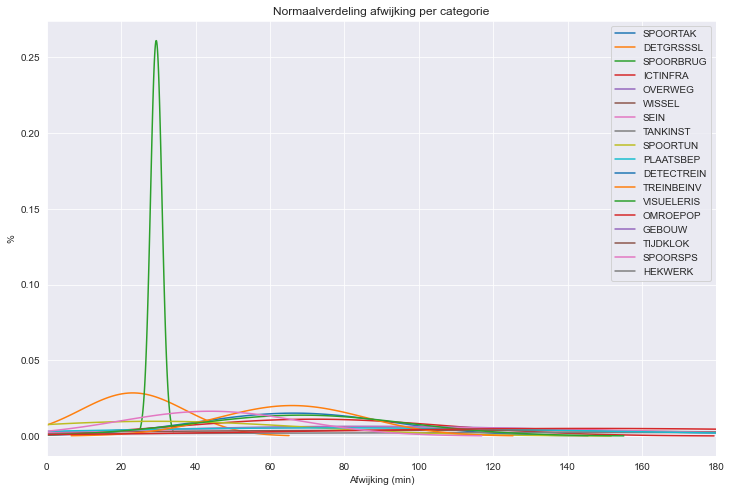

In [31]:
plot_norm(X,df_validatie['stm_equipm_soort_mld'].unique())

Normaalverdelingen stm_equipm_soort_mld zonder SPOORBRUG

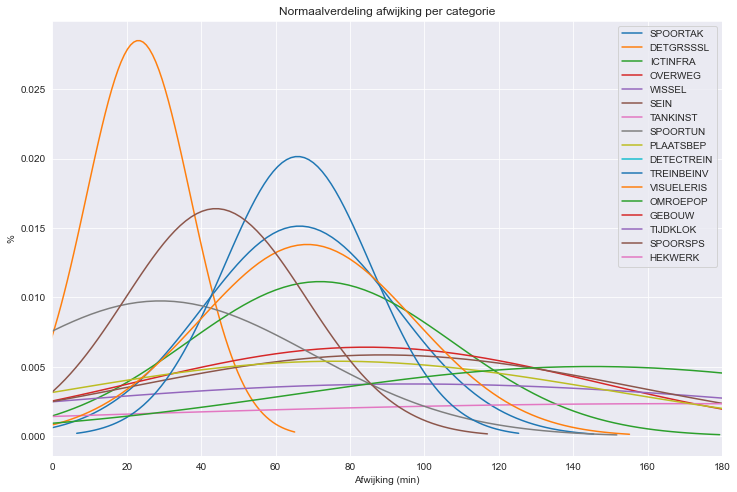

In [32]:
plot_norm(X,df_validatie['stm_equipm_soort_mld'][df_validatie['stm_equipm_soort_mld'] != 'SPOORBRUG'].unique())

De meeste voorspellingen zitten er minimaal 50 naast. Sommige categorie storingen worden iets accurater voorspeld dan anderen. Ik denk niet dat dit model accuraat genoeg is om een toegevoegde waarde te hebben voor ProRail.

### Dashboard actie v2

Hieronder zie je een aantal rows uit de validatieset met de categoriën en predicted en echte tijd. Ook wordt er voor elke categorie waar de storing uit bestaat een normaalverdeling geplot, zodat het gelijk duidelijk is of dit type storingen over het algemeen goed of slecht worden voorspeld.

K | 16:00:00 | 2.0 | SPOORBRUG | 
sample 2 --> Prediction:57.257652, True Value:87.000000, Diff:29.742348
--------------------------------------------------------------------------------
S | 13:00:00 | 5.0 | SEIN | 
sample 13 --> Prediction:93.923614, True Value:216.000000, Diff:122.076386
--------------------------------------------------------------------------------
T | 11:00:00 | 4.0 | TIJDKLOK | 
sample 53 --> Prediction:93.923614, True Value:221.000000, Diff:127.076386
--------------------------------------------------------------------------------


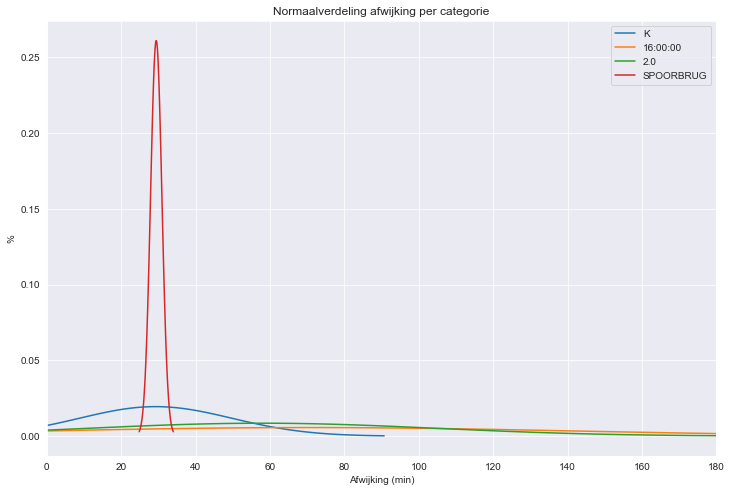

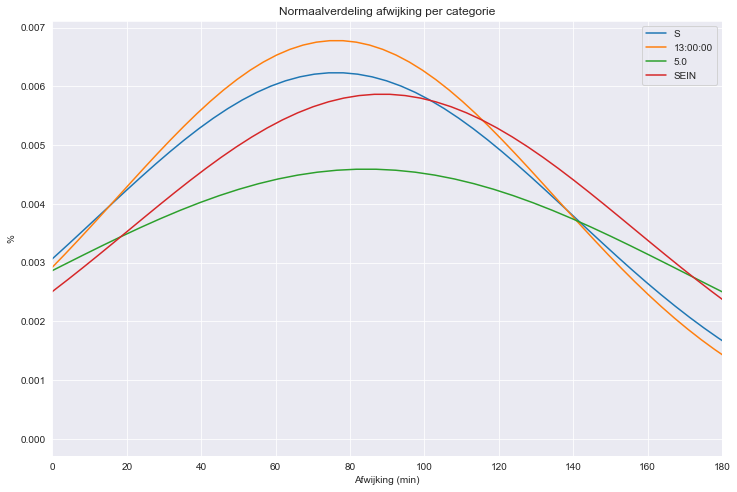

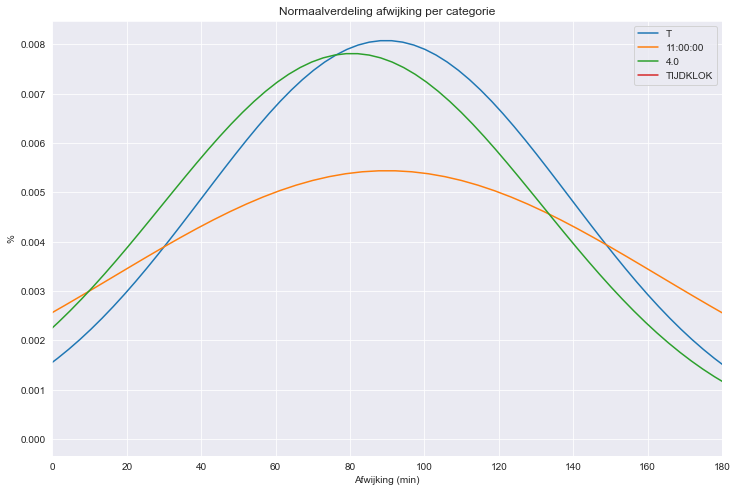

In [33]:
samples = X.sample(3, random_state=0)
for i,x in samples.iterrows():
    types = x[x.values==1].index
    for type in types:
        print(type, end=' | ')
    
    plot_norm(X,types)
    print()
    print("sample {} --> Prediction:{:0f}, True Value:{:0f}, Diff:{:0f}".format(i,x['prediction'],x['true_value'], x['diff']))
    print("-"*80)

Hierboven zie je 3 willekeurige storingen uit de validatieset
De eerste is erg accuraat (~17m). Uit de normaalverdeling blijkt dat dit door het type SPOORBRUG is. Deze storingen zijn goed te voorspellen maar dat lijkt te komen omdat dit soort storingen altijd binnen die marge vallen.
Bij de tweede en derde is de voorspelling niet zo accuraat. Uit de normaalverdelingen blijkt dat alle soorten categorieën ongeveer even slecht worden voorspeld over het algemeen.